#### importing libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### import dataset - global heat index

In [45]:
data = pd.read_csv("../datasets/global_heat_index.csv")
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [47]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


### Data cleansing

#### removing datapoints for night 
as there will be no sun radiation at night

In [48]:
data = data[(data['Hour'] >= 6) & (data['Hour'] <= 18)]
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9490 entries, 6 to 17514
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9490 non-null   int64  
 1   Month                  9490 non-null   int64  
 2   Day                    9490 non-null   int64  
 3   Hour                   9490 non-null   int64  
 4   Dew Point              9490 non-null   int64  
 5   Temperature            9490 non-null   float64
 6   Pressure               9490 non-null   float64
 7   Relative Humidity      9490 non-null   float64
 8   Wind Direction         9490 non-null   float64
 9   Wind Speed             9490 non-null   float64
 10  Solar Radiation (GHI)  9490 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 889.7 KB


### Input and output seperation

In [50]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x.head())
print(y.head())

    Year  Month  Day  Hour  Dew Point  Temperature    Pressure  \
6   2011      1    1     6          2     7.806705  986.249146   
7   2011      1    1     7          2     9.036408  987.038940   
8   2011      1    1     8          3    12.158280  987.897400   
9   2011      1    1     9          3    14.965301  988.211914   
10  2011      1    1    10          3    18.956082  988.054504   

    Relative Humidity  Wind Direction  Wind Speed  
6           67.093181       95.835983    1.815175  
7           64.035483      105.198181    1.615310  
8           55.105656      113.317665    1.439088  
9           47.166938      117.327606    1.063374  
10          36.747087       72.488327    0.545695  
6       0
7       0
8     159
9     363
10    533
Name: Solar Radiation (GHI), dtype: int64


In [51]:
col = x.columns.to_list()
col

['Year',
 'Month',
 'Day',
 'Hour',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Wind Direction',
 'Wind Speed']

#### scaling the x 

In [52]:
from sklearn.preprocessing import MinMaxScaler
x = pd.DataFrame(MinMaxScaler().fit(x).transform(x))

### feature selection using correlation matrix with heatmap

In [53]:
corr_matrix = data.corr()

<Axes: >

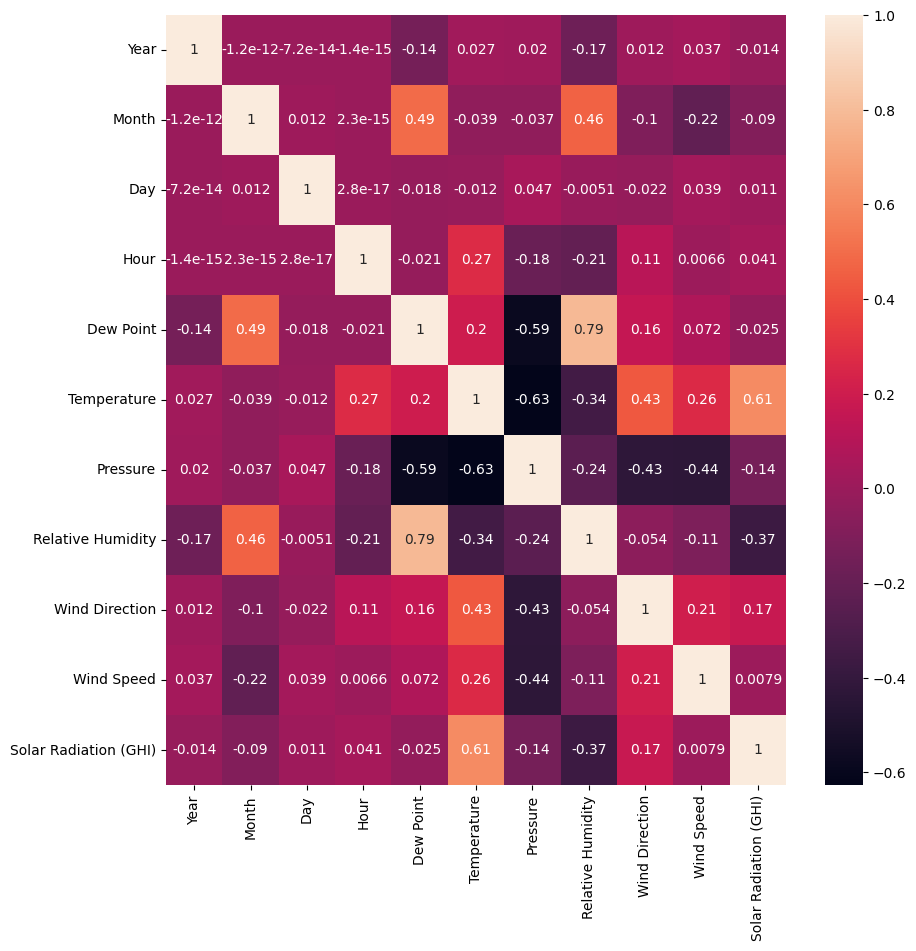

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

##### as we can see 
temperate has +.61 ,
wind dir +.17 ,
relative humidity -37 

#### using extraTreesClassifier

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

In [56]:
model = ExtraTreesRegressor()

In [57]:
model.fit(x,y)

ExtraTreesRegressor()

In [58]:
imp = pd.Series(model.feature_importances_,index=x.columns)
imp

0    0.004026
1    0.022265
2    0.010025
3    0.721461
4    0.009682
5    0.170509
6    0.015533
7    0.027519
8    0.010187
9    0.008794
dtype: float64

<Axes: >

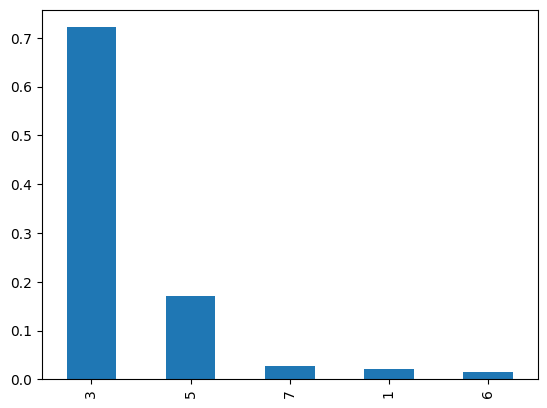

In [59]:
imp.nlargest(5).plot(kind="bar")

   Feature  Importance
3        3    0.718953
5        5    0.178405
7        7    0.024825
1        1    0.022206
6        6    0.015480
2        2    0.009901
8        8    0.009653
9        9    0.008912
4        4    0.007584
0        0    0.004081


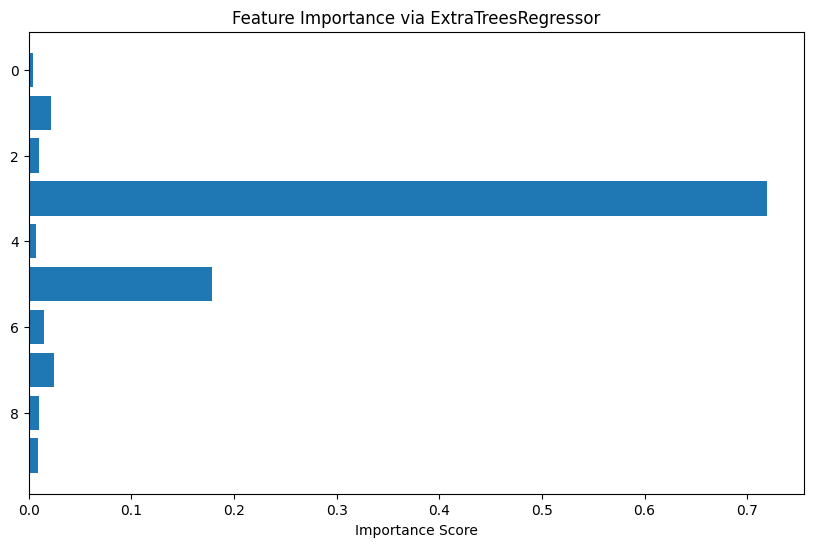

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model
model = ExtraTreesRegressor()
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_
feature_names = x.columns

# Create a DataFrame for easy viewing
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_importance_df)

# Optional: Visualize
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance via ExtraTreesRegressor')
plt.xlabel('Importance Score')
plt.show()

#### chi square test

for categorical features

- Measures the independence between a feature and the target.
- If a feature is strongly associated with the target, it gets a high Chi-Square score.
- Useful for classification problems with categorical data.


In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [62]:
# Apply Chi-Square test
chi2_selector = SelectKBest(score_func=chi2, k=10)  # Select top 2 features
X_kbest = chi2_selector.fit_transform(x, y)

# Show selected feature scores
scores = chi2_selector.scores_
feature_names = col

# Display ranked features
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2 Score': scores
}).sort_values(by='Chi2 Score', ascending=False)

print(importance_df)


             Feature  Chi2 Score
0               Year  504.976721
7  Relative Humidity  397.828591
5        Temperature  306.062548
3               Hour  271.978728
1              Month  236.303859
8     Wind Direction  221.823327
6           Pressure  213.040872
2                Day  208.497847
9         Wind Speed  148.735716
4          Dew Point   74.952667


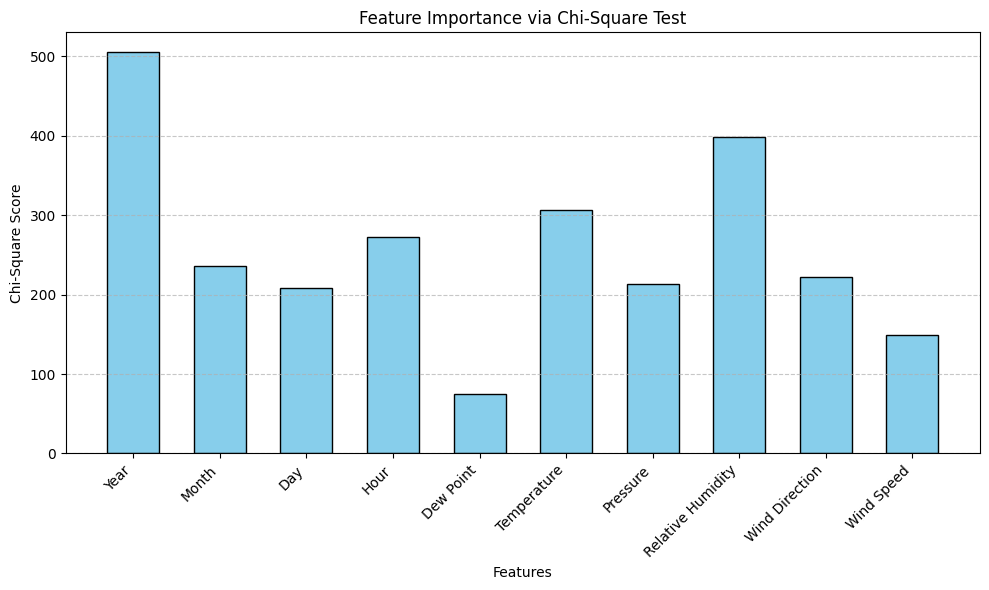

In [63]:

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better spacing
plt.bar(feature_names, scores, width=0.6, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.title('Feature Importance via Chi-Square Test')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to prevent clipping
plt.tight_layout()

plt.show()

- Model Insight: High scores like Year, Humidity, and Temperature suggest your target is sensitive to climate and temporal patterns.


#### K-fold cross validation

- Avoids Overfitting: Ensures that the model does not perform well only on the training data but generalizes to unseen data.
- Provides Robust Evaluation: Averages results over multiple iterations, reducing bias  and variance in the performance metrics.
- Efficient Use of Data: Maximizes the utilization of the dataset, especially when the data size is limited.

In [74]:
import pandas as pd

# Loading the dataset

df = pd.read_csv("../datasets/BostonHousing.csv")

print(df.head())

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [76]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
# boston = load_boston()
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# y = pd.Series(boston.target)

# Initialize model
model = LinearRegression()

# Set up K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store scores
mse_scores = []

# Perform K-Fold CV
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Display results
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE scores for each fold: [24.291119474973538, 20.867900937377637, 26.39596868928079, 23.40122507616277, 22.48676421204849]
Average MSE: 23.488595677968647


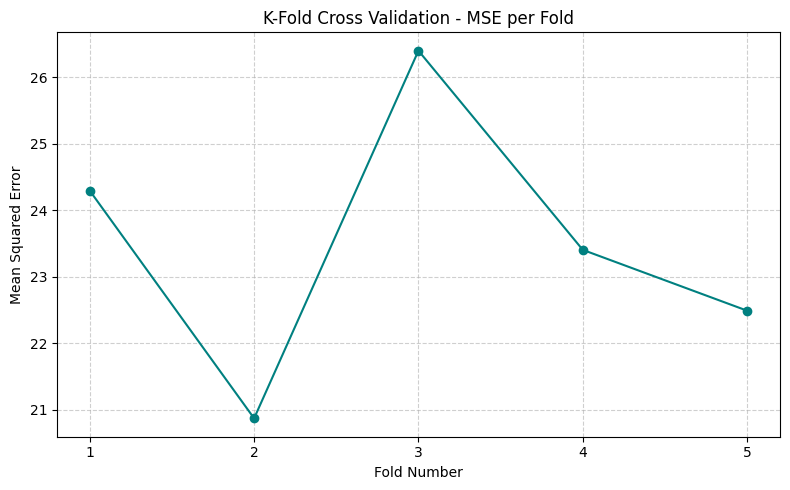

In [77]:
import matplotlib.pyplot as plt

# Visualize MSE scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='-', color='teal')
plt.title('K-Fold Cross Validation - MSE per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, len(mse_scores) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- Average MSE ≈ 23.49: This is your model’s typical squared error across folds. Lower is better.
- Variance across folds is modest: The scores range from ~20.87 to ~26.40, suggesting your model is reasonably stable across different splits.
- No catastrophic outliers: That’s a good sign — your model generalizes fairly well.
